# Processing SBE data with pIMOS

Included instruments:
- SBE56
- SBE39 T
- SBE39 TP
- SBE37 CTD
- And of course our very special friend, SBE37 4567 CT


In [1]:
# import seabird as sbd
# import crude_readers.read.SEABIRD_37_39_56 as read_sbd

import pIMOS.xrwrap.SEABIRD_37_39_56 as wrap_sbd
from pIMOS.xrwrap.NORTEK_VECTOR import NORTEK_VECTOR, num2date_lk

import os
import matplotlib.pyplot as plt
import datetime
import numpy as np 
import pandas as pd
import glob

import pIMOS.utils.quality_control as pqc
import importlib

# O Drive is //drive.irds.uwa.edu.au/CEME-BBL-001
# pIMOS_export_dir = r'O:\Data\pIMOS\KISSME'

project_root = r'G:\Experiments\kissme17'
archive_dir = os.path.join(project_root, 'archive') 
dbconfig_file = os.path.join(project_root, 'database', 'config.txt') 


# Import info and utilities to help with the archiving

In [19]:
import archive_info_and_utils as ai

db_config = ai.parse_dbconfig(dbconfig_file)
db_data = ai.read_db(dbconfig_file)
db_config
db_data

deployment_metadata = KISSME_Instruments.csv

possible_mooring_dates = possible_mooring_dates.csv
deployment_metadata = KISSME_Instruments.csv

possible_mooring_dates = possible_mooring_dates.csv


{'deployment_metadata':     StationID  Longitude  Latitude  Depth TimeZone            Site  \
 0      BRB200   123.0459  -14.2426   -200      UTC    Browse Shelf   
 1      BRB200   123.0459  -14.2426   -200      UTC    Browse Shelf   
 2      BRB200   123.0459  -14.2426   -200      UTC    Browse Shelf   
 3      BRB200   123.0459  -14.2426   -200      UTC    Browse Shelf   
 4      BRB200   123.0459  -14.2426   -200      UTC    Browse Shelf   
 ..        ...        ...       ...    ...      ...             ...   
 126     WP250   123.3490  -13.7659   -252      UTC  Browse Prelude   
 127     WP250   123.3490  -13.7659   -252      UTC  Browse Prelude   
 128     WP250   123.3490  -13.7659   -252      UTC  Browse Prelude   
 129     WP250   123.3490  -13.7659   -252      UTC  Browse Prelude   
 130     WP250   123.3490  -13.7659   -252      UTC  Browse Prelude   
 
      InstrumentDepth                      FileName            FilePath  \
 0             -193.1                  6752_000.

# Loop through all now using the spreadsheet

# Now the Vectors

In [ ]:
%%time

nens = 10000000

# rr = NORTEK_VECTOR(os.path.split(fullpath)[0], os.path.split(fullpath)[1], nens=10000, driver='dallsporpoise')

filetypes = ['Nortek Vector'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    attributes = {
        'site': row['Site'],
        'site_station': row['StationID'],
        'nominal_latitude': float(row['Latitude']),
        'nominal_longitude': float(row['Longitude']),
        'nominal_site_depth': float(row['Depth']),
        'nominal_instrument_height_asb': float(row['InstrumentHeight']),
        'nominal_instrument_orientation': row['Orientation'],
        'timezone': row['TimeZone'],
        'instrument_model': row['InstrumentType'],
        'instrument_serial_number': row['SerialNo'],
        }
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue
        
#     if row['FileName'] == '60170*.VEC':
        
#         continue

    if instrument in filetypes:

        filename_wc = os.path.join(project_root, row['FilePath'], row['FileName'])
        
        filenames = glob.glob(filename_wc)
        if len(filenames) == 0:
            print('Skipping ' + row['FileName'])
            continue
                        
        for filename in filenames:
#             if '6019' in filename or '6017' in filename:
#                 continue
#             print(filename)

#             rr = NORTEK_VECTOR(os.path.split(filename)[0], os.path.split(filename)[1], nens=[10000000, 20000000], driver='dallsporpoise')
#             rr = NORTEK_VECTOR(os.path.split(filename)[0], os.path.split(filename)[1], nens=[100000, 2000000], driver='dallsporpoise')
            rr = NORTEK_VECTOR(os.path.split(filename)[0], os.path.split(filename)[1], driver='dallsporpoise')

            rr.update_attributes_with_dict(attributes)

            rr.ds = rr.ds.assign_coords({'time': rr.ds.datetime.values})
            pqc.pimosInOutWaterQC(rr, mooring, db_data)

            ai.pIMOS_export(rr, archive_dir, instrument, str(sn)+'_'+os.path.split(filename)[1], csv=False)

            fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]), variable='pressure',plotraw=True)
            fig.savefig(rr.fullpath +'_'+os.path.split(filename)[1] + '.png', dpi=300)
            
            error


Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping 60170*.VEC
G:\Experiments\kissme17\Data\NortekADV\Vector-6329\6329.vec
['6329.vec']
0
Reading whole file
Reading vec with <module 'dallsporpoise' from 'c:\\users\\azulberti\\dropbox\\university\\phd\\03_code\\source_code_offpath\\dallsporpoise\\dallsporpoise\\__init__.py'>
2 of 4074995715 (4.91e-08%)
Reading file. 2 of 4074995715 (4.91e-08%)
Found hardware config at 0
Not convinced this is reading correctly
Found head config at 48
Found user config at 272
Reading user config at 272
Done
Scanned common
Initialising ADV
Setting chunk_size to 64000
Continuous mode - happy days. 
Scanning ADV
MPLTIME NOT IN DAT, INITIALISING
VEL NOT IN DAT, INITIALISING
c has reset.


# Now the Signature


'6019_601903.VEC'

# Now the LISST

# Now the Wetlabs

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
whoa
G:\Experiments\kissme17\Data\FLNTU\1835.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\1835\FLNTUSB-1835_(NTU).dev
Im a string
Updating attributes function of the class.
Setting attribute "title" to "Measured data from a TDRI ADCP read from .PD0 files"
Setting attribute "institution" to "UWA"
Setting attribute "source" to "TDRI ADCP [Workhorse, Quartermaster, or Longranger]"
Setting attribute "history" to ""
Setting attribute "references" to ""
Setting attribute "comment" to ""
Wetlab model:FLNTUSB
Wetlab FLNTUSBserial number:1835
Date device file created:10/15/14
File contains  calibration information for:
     Chlorophyll
     Turbidity
c4
WARNING, COMPLIANCE 

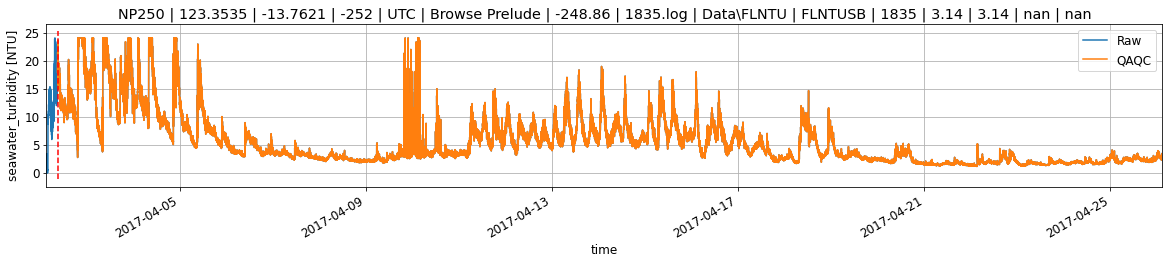

whoa
G:\Experiments\kissme17\Data/FLNTU\3194.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\3194\FLNTUSB-3194(NTU).dev
Im a string
Updating attributes function of the class.
Setting attribute "title" to "Measured data from a TDRI ADCP read from .PD0 files"
Setting attribute "institution" to "UWA"
Setting attribute "source" to "TDRI ADCP [Workhorse, Quartermaster, or Longranger]"
Setting attribute "history" to ""
Setting attribute "references" to ""
Setting attribute "comment" to ""
Wetlab model:FLNTUSB
Wetlab FLNTUSBserial number:3194
Date device file created:11/03/14
File contains  calibration information for:
     Chlorophyll
     Turbidity
c4
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
c2
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Device file calibration complete.
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute 

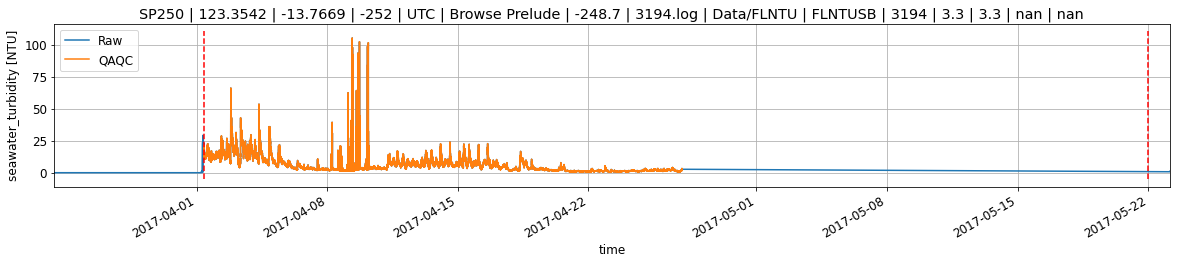

whoa
G:\Experiments\kissme17\Data\FLNTU\2997.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\2997\FLNTUSB-2997(NTU).dev
Im a string
Updating attributes function of the class.
Setting attribute "title" to "Measured data from a TDRI ADCP read from .PD0 files"
Setting attribute "institution" to "UWA"
Setting attribute "source" to "TDRI ADCP [Workhorse, Quartermaster, or Longranger]"
Setting attribute "history" to ""
Setting attribute "references" to ""
Setting attribute "comment" to ""
Wetlab model:FLNTUSB
Wetlab FLNTUSBserial number:2997
Date device file created:10/23/14
File contains  calibration information for:
     Chlorophyll
     Turbidity
c4
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
c2
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Device file calibration complete.
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting att

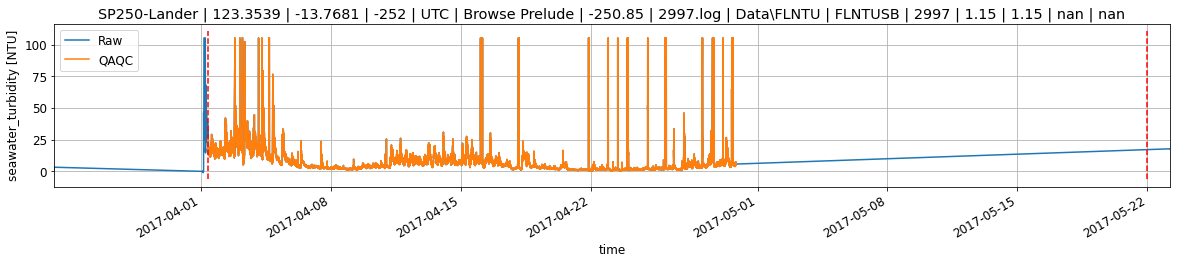

G:\Experiments\kissme17\Data\FLNTU\2535.log
G:\Experiments\kissme17\Data\FLNTU\Device Files\2535\FLNTUSB-2535.dev
Im a string
Updating attributes function of the class.
Setting attribute "title" to "Measured data from a TDRI ADCP read from .PD0 files"
Setting attribute "institution" to "UWA"
Setting attribute "source" to "TDRI ADCP [Workhorse, Quartermaster, or Longranger]"
Setting attribute "history" to ""
Setting attribute "references" to ""
Setting attribute "comment" to ""
Wetlab model:FLNTUSB
Wetlab FLNTUSBserial number:2535
Date device file created:01/26/2012
File contains  calibration information for:
     Chlorophyll
     Turbidity
c4
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
c2
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Device file calibration complete.
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "WP250"
Setting attribute "nominal_latitude" to "-13.7659"
Setting attribute "nominal_longitude" to "123.349"
Setting attribute "nominal_

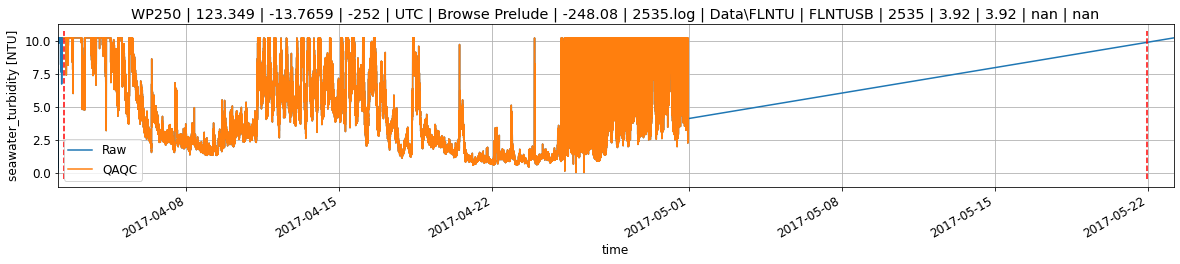

In [5]:
from pIMOS.xrwrap.WETLABS_NTU import WETLABS_NTU, parse_device_file


filetypes = ['FLNTUSB'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

dfd = r'G:\Experiments\kissme17\Data\FLNTU\Device Files'

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    attributes = {
        'site': row['Site'],
        'site_station': row['StationID'],
        'nominal_latitude': float(row['Latitude']),
        'nominal_longitude': float(row['Longitude']),
        'nominal_site_depth': float(row['Depth']),
        'nominal_instrument_height_asb': float(row['InstrumentHeight']),
        'nominal_instrument_orientation': row['Orientation'],
        'timezone': row['TimeZone'],
        'instrument_model': row['InstrumentType'],
        'instrument_serial_number': row['SerialNo'],
        }
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        folder_df = os.path.join(project_root, 'Data\FLNTU\Device Files', str(sn))
        dfn = glob.glob(folder_df+'/*.dev')
        
        if not len(dfn)==1:
            print('whoa')
            dfn = [i for i in dfn if '(NTU)' in os.path.split(i)[1]]
        else:
            pass
        
        dfn = dfn[0]            
        
        print(filename)
        print(dfn)
        
        rr = WETLABS_NTU(filename)
        rr._calibrate_device(dfn)
        
        rr.update_attributes_with_dict(attributes)

        pqc.pimosInOutWaterQC(rr, mooring, db_data)
                
        ai.pIMOS_export(rr, archive_dir, instrument, sn)
        fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]), variable='turbidity',plotraw=True)
        fig.savefig(rr.fullpath + '.png', dpi=300)

# Now the TRDI instruments


Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
G:\Experiments\kissme17\Data\RDIADCP\Monitor20089\0089_000.000
File exists
Im a string

Reading file G:\Experiments\kissme17\Data\RDIADCP\Monitor20089/0089_000.000 ...
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
Converting variable: beamvel...
Converting variable: percent_good...
Converting variable: echo...
Converting variable: corr...
Converting variable: pressure...
Converting variable: temperature...
Converting variable: heading...
Converting variable: pitch...
Converting variable: roll...
Converting vari

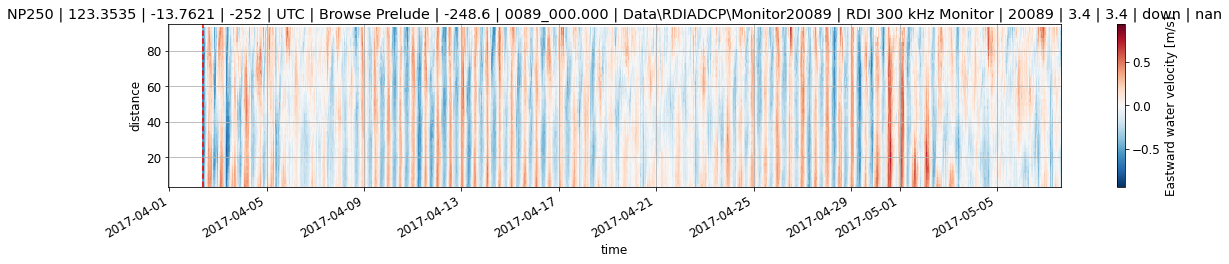

G:\Experiments\kissme17\Data\RDIADCP\QuarterMaster16856\6856_000.000
File exists
Im a string

Reading file G:\Experiments\kissme17\Data\RDIADCP\QuarterMaster16856/6856_000.000 ...
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
Converting variable: beamvel...
Converting variable: percent_good...
Converting variable: echo...
Converting variable: corr...
Converting variable: pressure...
Converting variable: temperature...
Converting variable: heading...
Converting variable: pitch...
Converting variable: roll...
Converting variable: mpltime...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO TH

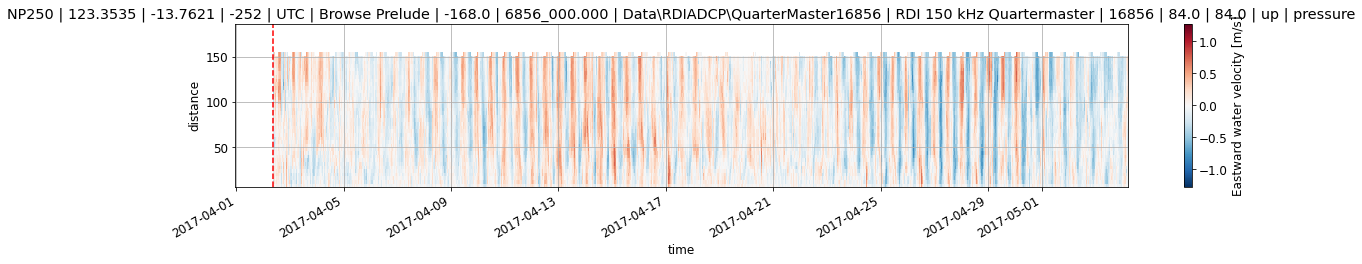

G:\Experiments\kissme17\Data\RDIADCP\LongRanger24613\LR75_000.000
File exists
Im a string

Reading file G:\Experiments\kissme17\Data\RDIADCP\LongRanger24613/LR75_000.000 ...
  Encountered end of file.  Cleaning up data.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
Converting variable: beamvel...
Converting variable: percent_good...
Converting variable: echo...
Converting variable: corr...
Converting variable: pressure...
Converting variable: temperature...
Converting variable: heading...
Converting variable: pitch...
Converting variable: roll...
Converting variable: mpltime...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS F

c:\users\azulberti\dropbox\university\phd\03_code\source_code\pimos\pIMOS\xrwrap\RDI_ADCP_PD02.py:442: RuntimeWarning: invalid value encountered in sqrt
  TILT = np.arccos(np.sqrt(1 - np.sin(roll*deg2rad)**2\


ND: 246.3
Trimmed sidelobe
G:\Experiments\kissme17\archive\RDI75 kHz Longranger
Parsing attributes.
Blanking 280616 values.


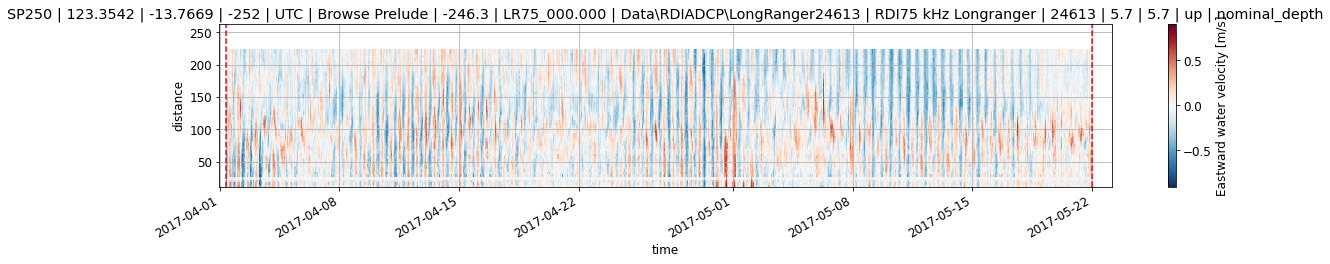

G:\Experiments\kissme17\Data\RDIADCP\Sentinel20092\LOGS_001.000
File exists
Im a string

Reading file G:\Experiments\kissme17\Data\RDIADCP\Sentinel20092/LOGS_001.000 ...
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
Converting variable: beamvel...
Converting variable: percent_good...
Converting variable: echo...
Converting variable: corr...
Converting variable: pressure...
Converting variable: temperature...
Converting variable: heading...
Converting variable: pitch...
Converting variable: roll...
Converting variable: mpltime...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM se

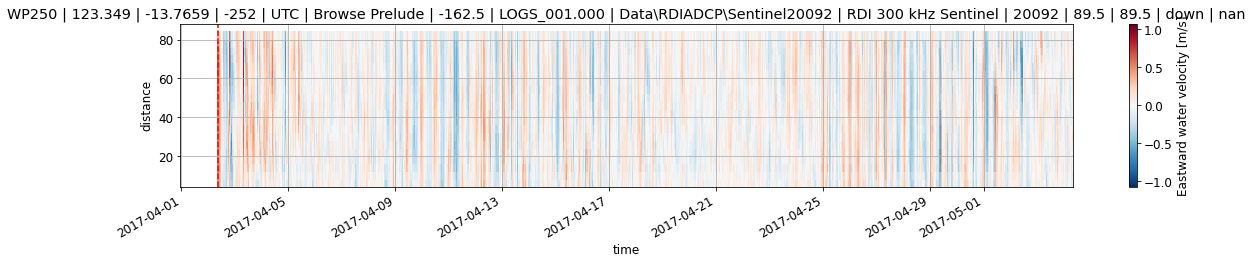

G:\Experiments\kissme17\Data\RDIADCP\QuarterMaster11795\1795_000.000
File exists
Im a string

Reading file G:\Experiments\kissme17\Data\RDIADCP\QuarterMaster11795/1795_000.000 ...
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
CODED FOR BEAM ONLY.
Converting variable: beamvel...
Converting variable: percent_good...
Converting variable: echo...
Converting variable: corr...
Converting variable: pressure...
Converting variable: temperature...
Converting variable: heading...
Converting variable: pitch...
Converting variable: roll...
Converting variable: mpltime...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Rotating...
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO THIS FROM self.ds NOT self._data.
SHOULD DO TH

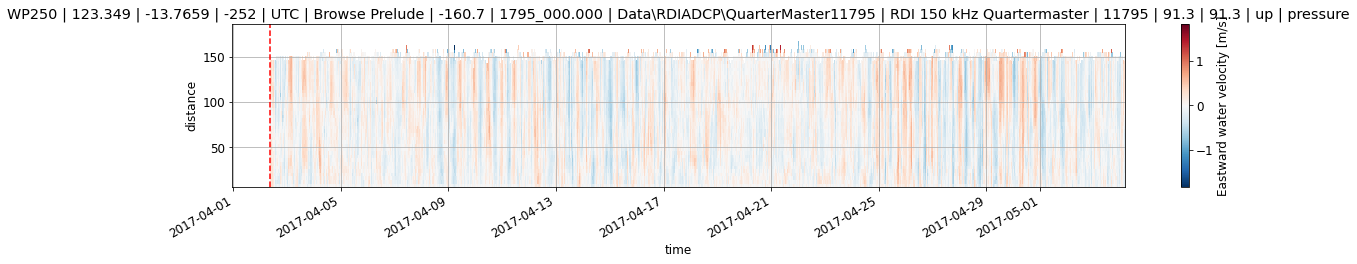

In [6]:
import pIMOS.xrwrap.RDI_ADCP_PD02 as wrap_rdi

filetypes = ['RDI 150 kHz Quartermaster', 'RDI 300 kHz Monitor', 'RDI75 kHz Longranger', 'RDI 300 kHz Sentinel', 'RDI 300 kHz Monitor'];
# filetypes = ['RDI 150 kHz Quartermaster'];
# filetypes = ['RDI75 kHz Longranger'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    attributes = {
        'site': row['Site'],
        'site_station': row['StationID'],
        'nominal_latitude': float(row['Latitude']),
        'nominal_longitude': float(row['Longitude']),
        'nominal_site_depth': float(row['Depth']),
        'nominal_instrument_height_asb': float(row['InstrumentHeight']),
        'nominal_instrument_orientation': row['Orientation'],
        'timezone': row['TimeZone'],
        'instrument_model': row['InstrumentType'],
        'instrument_serial_number': row['SerialNo'],
        }
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        pd0_filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        print(pd0_filename)

        if os.path.exists(pd0_filename):
            print('File exists')
        else:
            raise(Exception)

        rr = wrap_rdi.RDI_ADCP_PD02(pd0_filename, rotate=True, mapbins=True)

        rr.update_attributes_with_dict(attributes)

        pqc.pimosInOutWaterQC(rr, mooring, db_data)
        pqc.pimosTiltVelocitySimpleQC(rr)
        pqc.pimosEchoIntensitySimpleQC(rr, thresh_1=45)
        pqc.pimosErrorVelocitySetQC(rr)
        pqc.pimosCorrMagVelocitySetQC(rr)
        pqc.pimosPercentGoodVelocitySetRDIQC(rr)

        # Keep the sidelobe interference like this for now, not using the IMOS methods.
        if not type(row['SidelobeInt'])==str:
            pass # 
        elif row['SidelobeInt'].lower() == 'pressure':
            rr._calc_sidelobe_trim()
        elif row['SidelobeInt'].lower() == 'seabed':
            rr._calc_sidelobe_trim(attributes['nominal_instrument_height_asb'])
        elif row['SidelobeInt'].lower() == 'nominal_depth':
            nd = abs(attributes['nominal_instrument_height_asb']+attributes['nominal_site_depth'])
            print('ND: {}'.format(nd))
            rr._calc_sidelobe_trim(nd)
        else:
            raise(Exception("Not recognised"))
        
        ai.pIMOS_export(rr, archive_dir, instrument, sn, csv=False)
#         fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]))
        fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]), variable='u',plotraw=False)

        fig.savefig(rr.fullpath + '.png', dpi=300)
        

### Start with the SEABIRD data files that load from ascs

In [47]:
db_config
# index, row in df.iterrows()
for index, row in db_data['deployment_metadata'].iterrows():
    print(row)

StationID                              BRB200
Longitude                            123.0459
Latitude                             -14.2426
Depth                                    -200
TimeZone                                  UTC
Site                             Browse Shelf
InstrumentDepth                        -193.1
FileName                         6752_000.000
FilePath                   Data\RDIADCP\16752
InstrumentType      RDI 150 kHz Quartermaster
SerialNo                                16752
InstrumentHeight                          6.9
DeploymentHeight                          6.9
Orientation                                up
SidelobeInt                          pressure
Name: 0, dtype: object
StationID                                 BRB200
Longitude                               123.0459
Latitude                                -14.2426
Depth                                       -200
TimeZone                                     UTC
Site                                Browse

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
StationID                    NP250
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -237.32
FileName              67761705.asc
FilePath                Data\SBE39
InstrumentType            SBE39 TP
SerialNo                      6776
InstrumentHeight             14.68
DeploymentHeight             14.68
Orientation                    NaN
SidelobeInt                    NaN
Name: 25, dtype: object
G:\Experiments\kissme17\Data\SBE39\67761705.asc
File exists
asc file appears to be for an SBE39...
temperature and pressure
WARNING

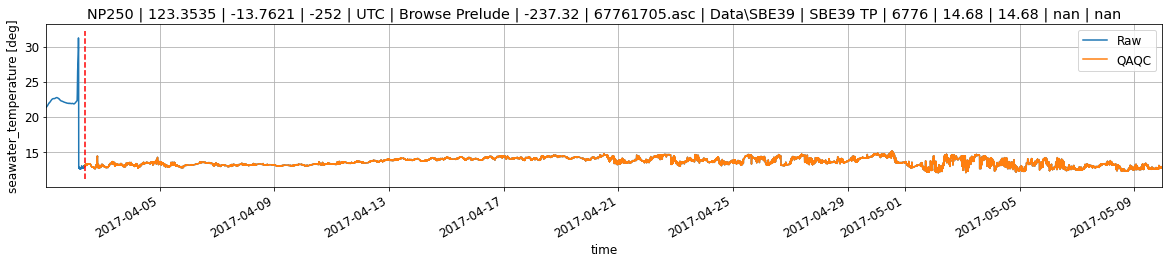

StationID                    NP250
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -222.32
FileName                  4455.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      4455
InstrumentHeight             29.68
DeploymentHeight             29.68
Orientation                    NaN
SidelobeInt                    NaN
Name: 27, dtype: object
G:\Experiments\kissme17\Data\SBE39\4455.asc
File exists
asc file appears to be for an SBE39...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station

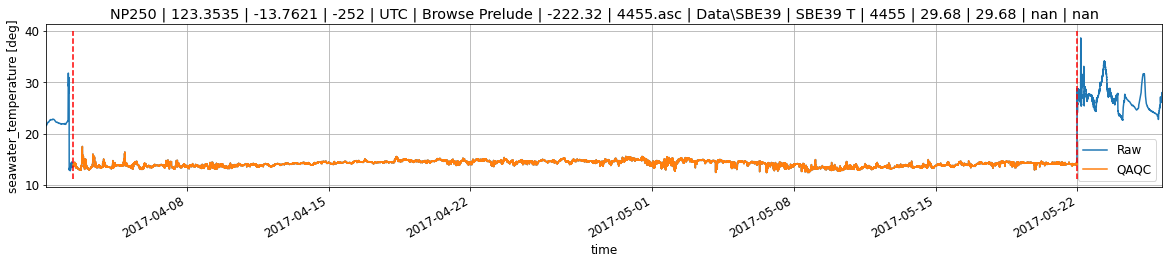

StationID                    NP250
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth            -172.32
FileName                  4456.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      4456
InstrumentHeight             79.68
DeploymentHeight             79.68
Orientation                    NaN
SidelobeInt                    NaN
Name: 32, dtype: object
G:\Experiments\kissme17\Data\SBE39\4456.asc
File exists
asc file appears to be for an SBE39...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station

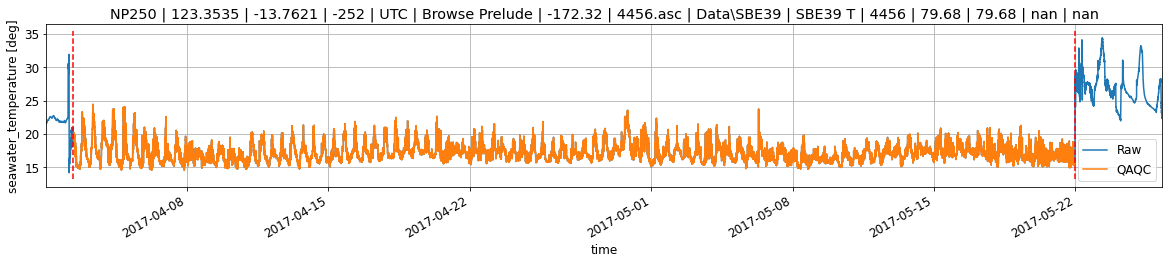

StationID                    NP250
Longitude                 123.3535
Latitude                  -13.7621
Depth                         -252
TimeZone                       UTC
Site                Browse Prelude
InstrumentDepth             -142.2
FileName                  4452.asc
FilePath                Data\SBE39
InstrumentType             SBE39 T
SerialNo                      4452
InstrumentHeight             109.8
DeploymentHeight             109.8
Orientation                    NaN
SidelobeInt                    NaN
Name: 36, dtype: object
G:\Experiments\kissme17\Data\SBE39\4452.asc
File exists
asc file appears to be for an SBE39...
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station

KeyboardInterrupt: 

In [50]:
# csvfile = os.path.join(db_config['db_root'], db_config['db_csv'])
# os.path.exists(csvfile)
importlib.reload(ai)

filetypes = ['SBE39 TP', 'SBE39 T', 'SBE39-ext T', 'SBE37 CT'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

df = db_data['deployment_metadata']
# df = df.loc[df['SerialNo']==3799]

for index, row in df.iterrows():
#     line = line.split(',')
    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']

    attributes = {
        'site': row['Site'],
        'site_station': row['StationID'],
        'nominal_latitude': float(row['Latitude']),
        'nominal_longitude': float(row['Longitude']),
        'nominal_site_depth': float(row['Depth']),
        'nominal_instrument_height_asb': float(row['InstrumentHeight']),
        'timezone': row['TimeZone'],
        'instrument_model': row['InstrumentType'],
        'instrument_serial_number': row['SerialNo'],
        }

    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in ['SBE39 TP', 'SBE39 T', 'SBE39-ext T']:
        print(row)

        asc_filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        print(asc_filename)

        if os.path.exists(asc_filename):
            print('File exists')
        else:
            raise(Exception)

#             mcout_asc = read_sbd.parse_seabird_asc(asc_filename)

        folder, file = os.path.split(asc_filename)
        rr = wrap_sbd.SEABIRD_37_39_56(folder, file, model=instrument[0:5])
        rr.update_attributes_with_dict(attributes)

#         ai.qc_impossible_date(rr, mooring, db_data, year_1=1890)
        pqc.pimosInOutWaterQC(rr, mooring, db_data, year_1=1890)

        ai.pIMOS_export(rr, archive_dir, instrument[0:5], sn)
        fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]))
        fig.savefig(rr.fullpath + '.png', dpi=300)
        

### Now the SEABIRD data files that load from cnvs

Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
Skipping BRB200
G:\Experiments\kissme17\Data\SBE56\SBE056_00577_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_00577_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attri

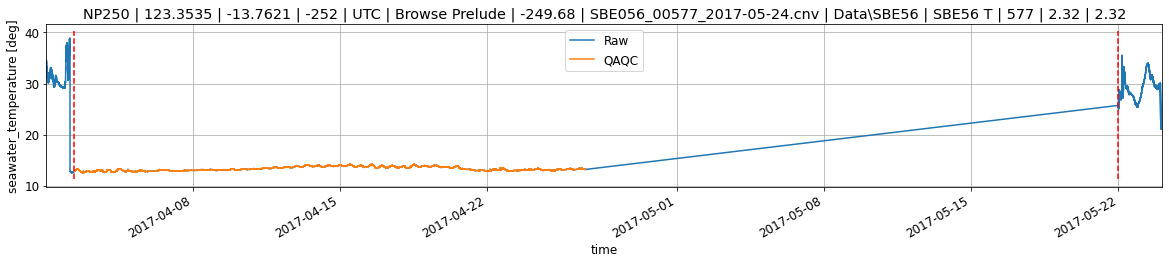

G:\Experiments\kissme17\Data\SBE37\SBE37SM-11063.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE37/SBE37SM-11063.cnv...
No lat/lon stored.
Time code timeS
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "5.08"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE37 CTD"
Setting attribute "instrument_serial_number" to "11063"
G:

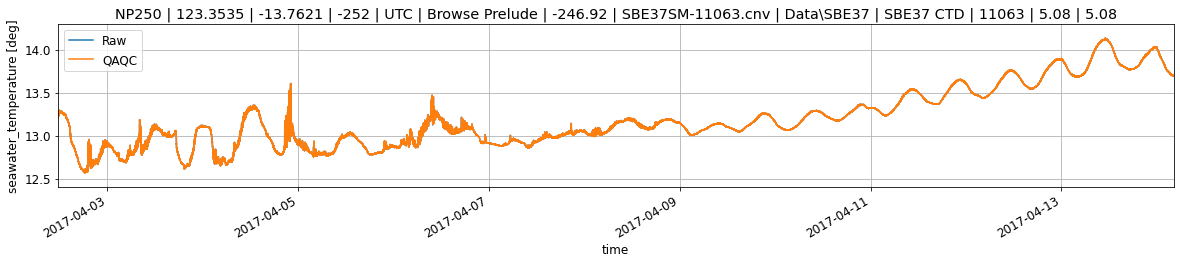

G:\Experiments\kissme17\Data\SBE56\SBE05607371.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607371.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "9.68"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7371"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


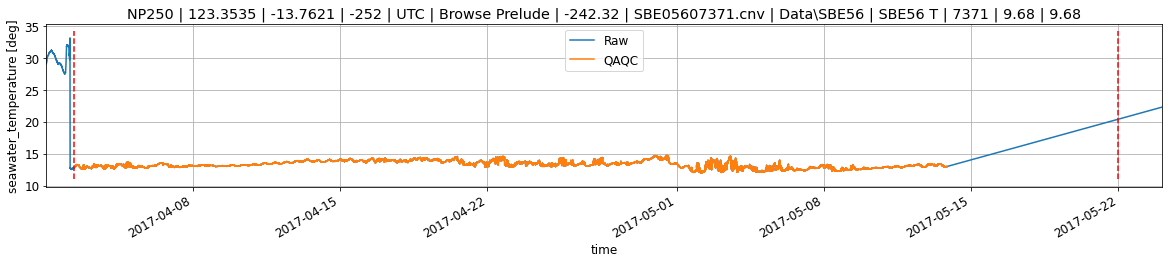

G:\Experiments\kissme17\Data\SBE56\SBE05607374.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607374.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "19.68"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7374"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


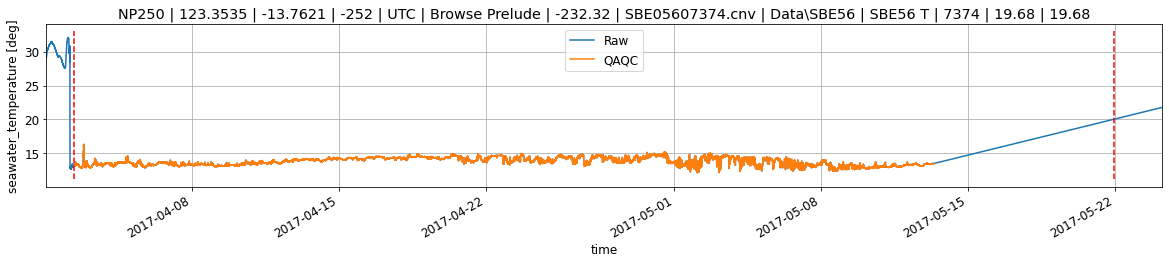

G:\Experiments\kissme17\Data\SBE56\SBE05607375.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607375.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "39.68"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7375"
G:\Experiments\kissme17\archive\SBE56
Blanking 581896 values.


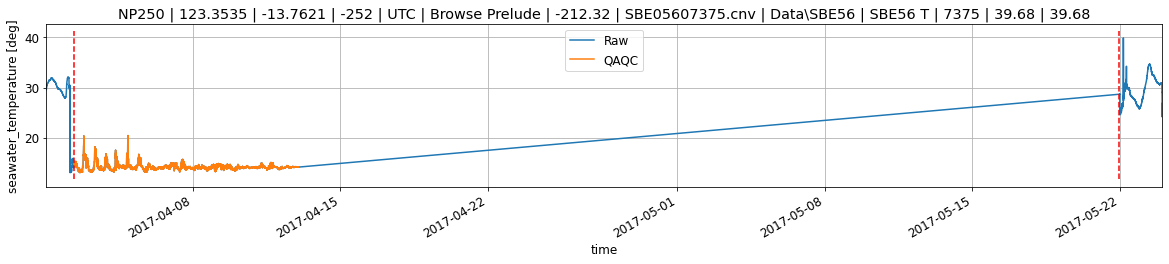

G:\Experiments\kissme17\Data\SBE56\SBE05607376.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607376.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "49.68"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7376"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


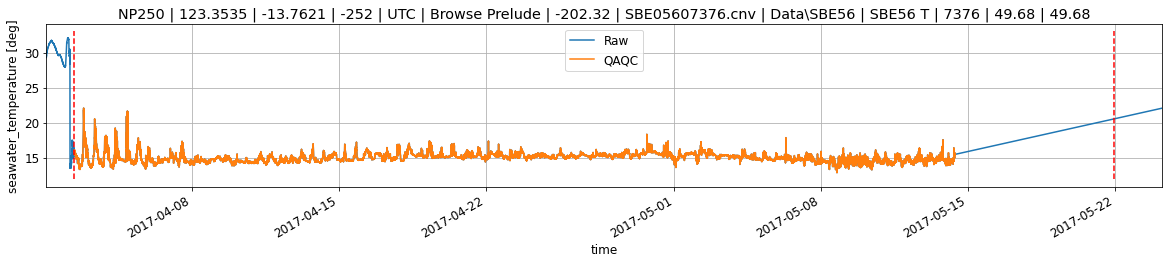

G:\Experiments\kissme17\Data\SBE56\SBE05607377.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607377.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "59.68"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7377"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


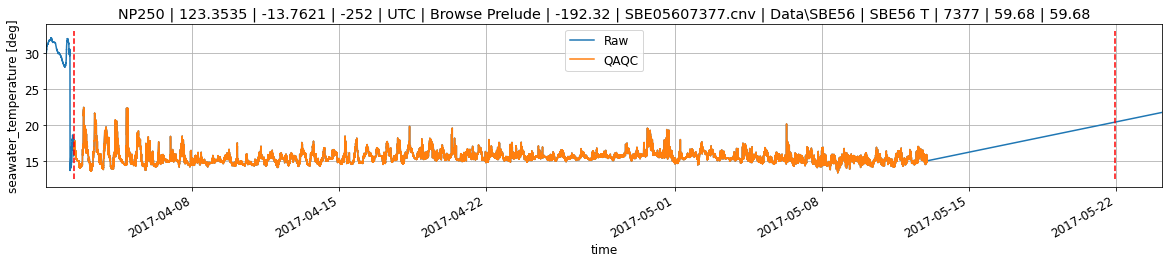

G:\Experiments\kissme17\Data\SBE56\SBE05607378.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607378.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "69.68"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7378"
G:\Experiments\kissme17\archive\SBE56
Blanking 600295 values.


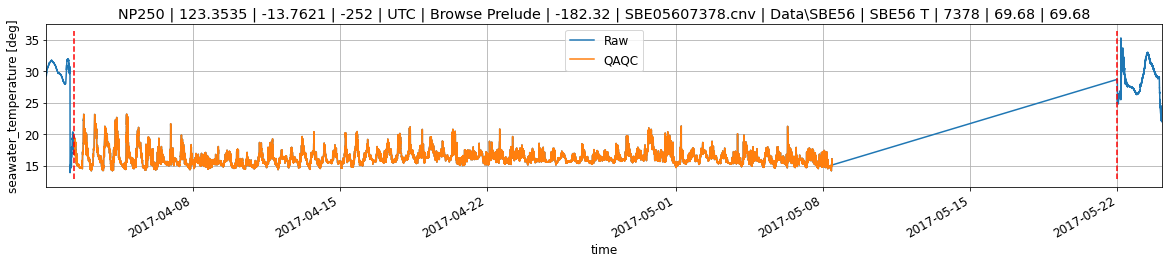

G:\Experiments\kissme17\Data\SBE37\SBE37SM-12739.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE37/SBE37SM-12739.cnv...
No lat/lon stored.
Time code timeS
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "89.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE37 CTD"
Setting attribute "instrument_serial_number" to "12739"
G:

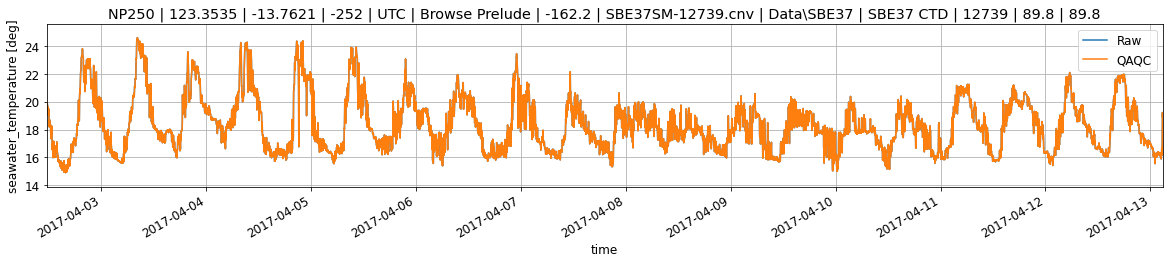

G:\Experiments\kissme17\Data\SBE56\SBE05607399.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607399.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "99.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7399"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


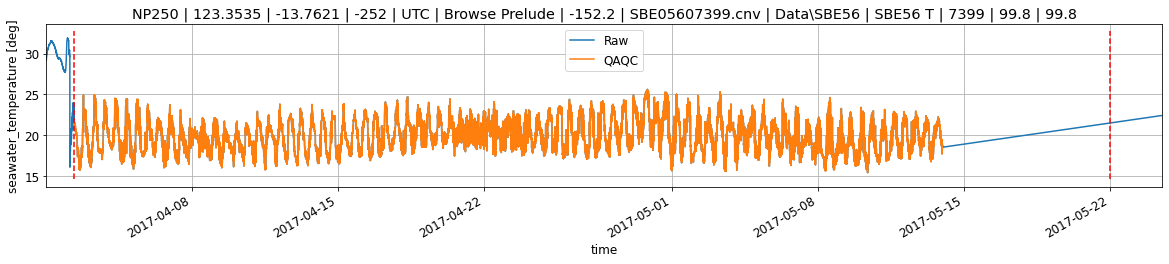

G:\Experiments\kissme17\Data\SBE56\SBE05607400.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607400.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "119.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7400"
G:\Experiments\kissme17\archive\SBE56
Blanking 230460 values.


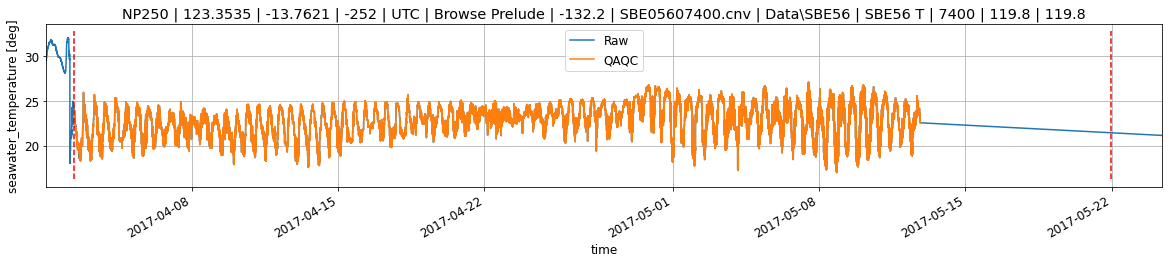

G:\Experiments\kissme17\Data\SBE56\SBE05607401.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607401.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "129.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7401"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


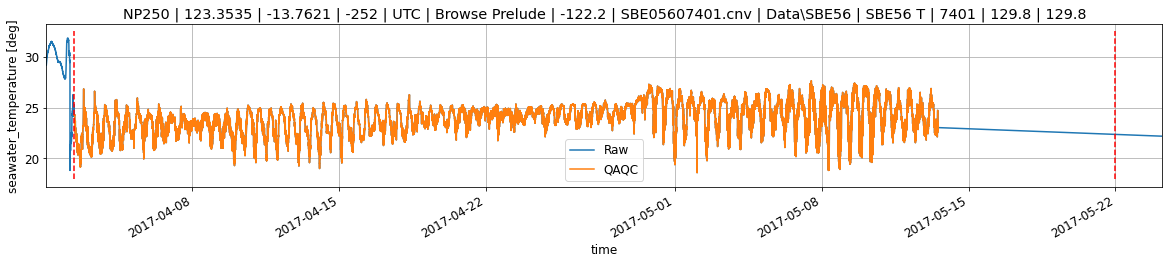

G:\Experiments\kissme17\Data\SBE56\SBE05607402.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607402.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "139.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7402"
G:\Experiments\kissme17\archive\SBE56
Blanking 230524 values.


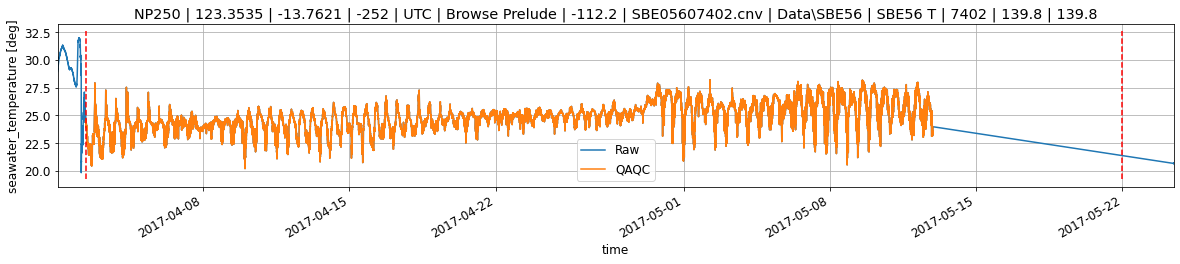

G:\Experiments\kissme17\Data\SBE56\SBE05607403.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607403.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "149.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7403"
G:\Experiments\kissme17\archive\SBE56
Blanking 230475 values.


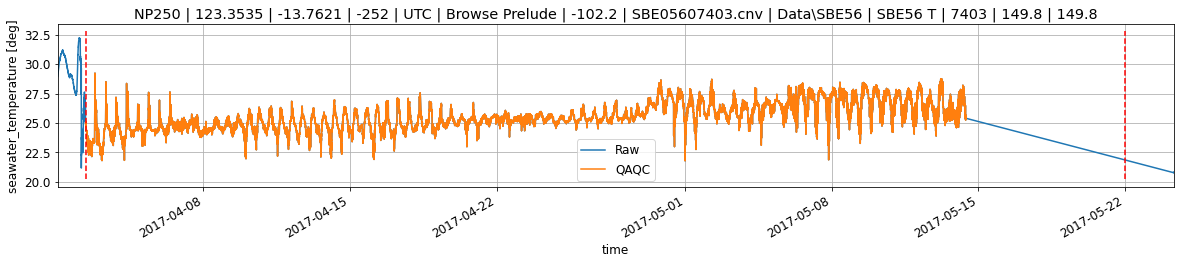

G:\Experiments\kissme17\Data\SBE37\SBE37SM-12738.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE37/SBE37SM-12738.cnv...
No lat/lon stored.
Time code timeS
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "159.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE37 CTD"
Setting attribute "instrument_serial_number" to "12738"
G

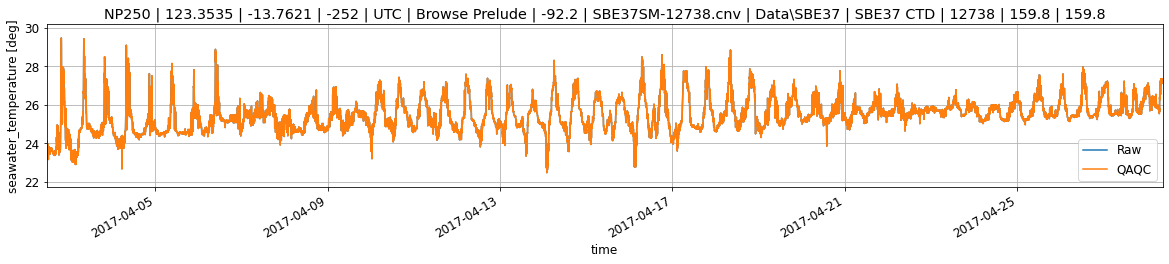

G:\Experiments\kissme17\Data\SBE56\SBE05607426.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607426.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "169.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7426"
G:\Experiments\kissme17\archive\SBE56
Blanking 230456 values.


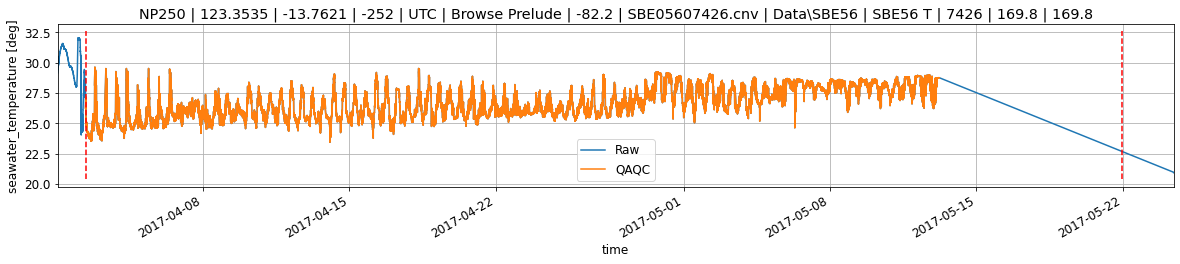

G:\Experiments\kissme17\Data\SBE56\SBE056_00973_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_00973_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "179.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "973"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


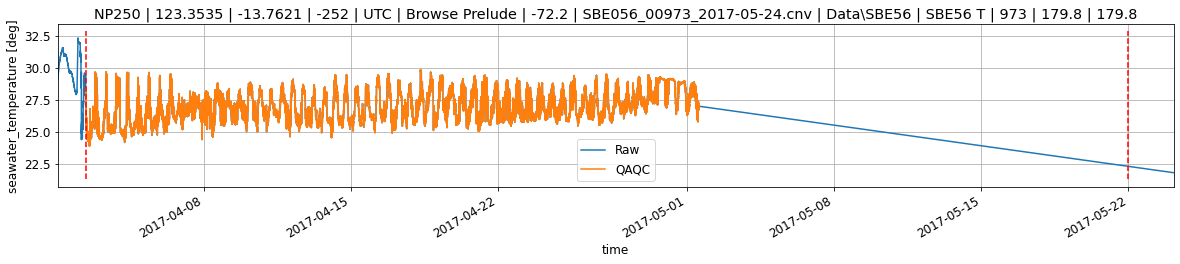

G:\Experiments\kissme17\Data\SBE56\SBE056_00987_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_00987_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "189.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "987"
G:\Experiments\kissme17\archive\SBE56
Blanking 235622 values.


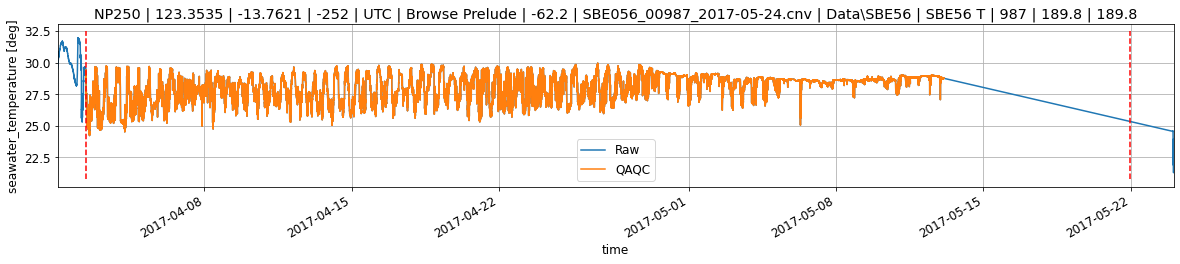

G:\Experiments\kissme17\Data\SBE56\SBE056_01003_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_01003_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "209.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "1003"
G:\Experiments\kissme17\archive\SBE56
Blanking 596425 values.


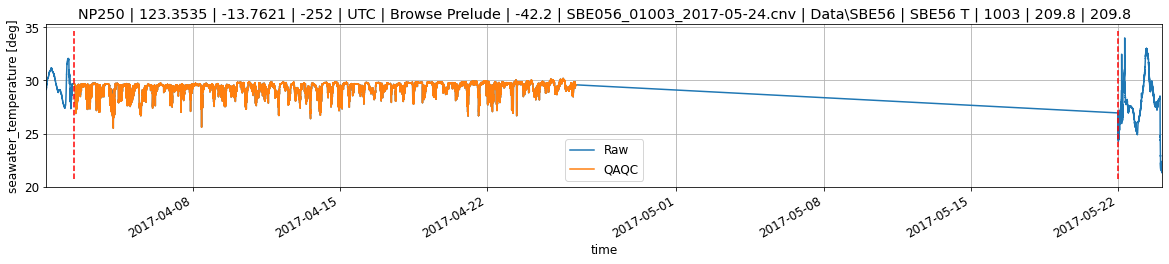

G:\Experiments\kissme17\Data\SBE56\SBE056_01015_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_01015_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "219.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "1015"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


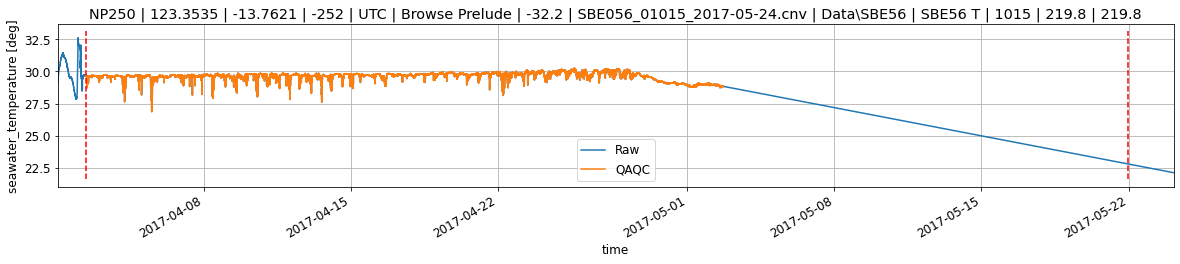

G:\Experiments\kissme17\Data\SBE37\SBE37SM-9276.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE37/SBE37SM-9276.cnv...
No lat/lon stored.
Time code timeS
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "NP250"
Setting attribute "nominal_latitude" to "-13.7621"
Setting attribute "nominal_longitude" to "123.3535"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "229.6"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE37 CTD"
Setting attribute "instrument_serial_number" to "9276"
G:\E

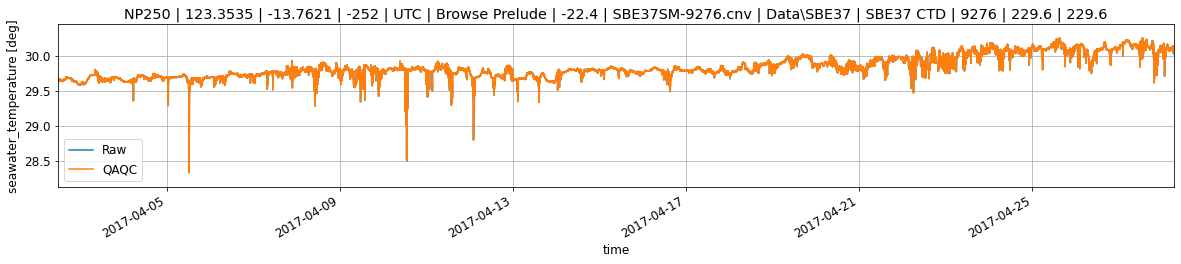

G:\Experiments\kissme17\Data\SBE56\SBE05607372.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607372.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "3.3"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7372"
G:\Experiments\kissme17\archive\SBE56
Blanking 162864 values.


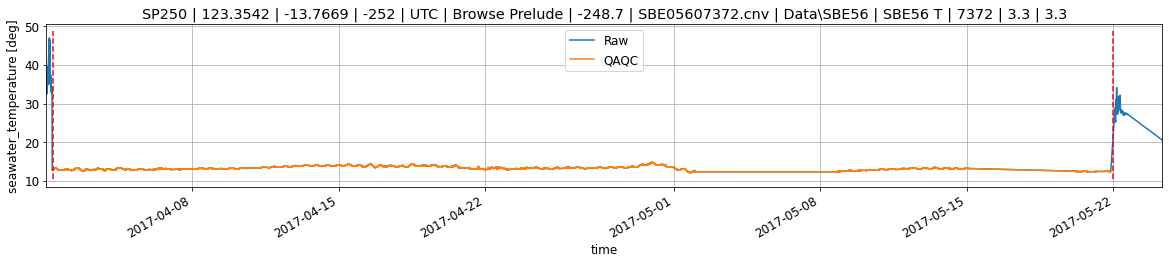

G:\Experiments\kissme17\Data\SBE56\SBE05600674.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600674.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "5.1"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "674"
G:\Experiments\kissme17\archive\SBE56
Blanking 470301 values.


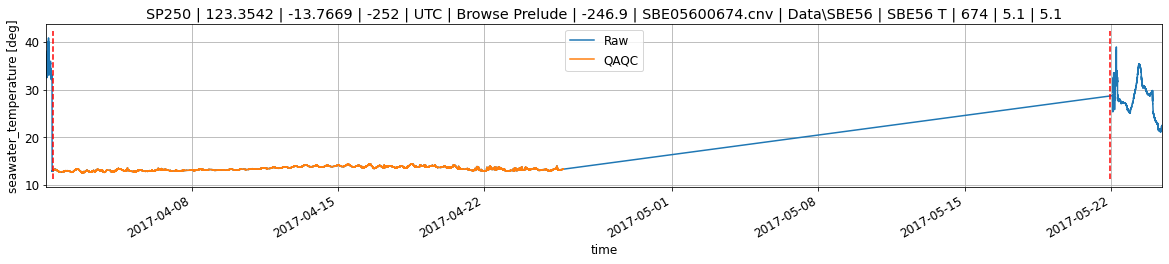

G:\Experiments\kissme17\Data\SBE56\SBE05600711.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600711.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "10.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "711"
G:\Experiments\kissme17\archive\SBE56
Blanking 433699 values.


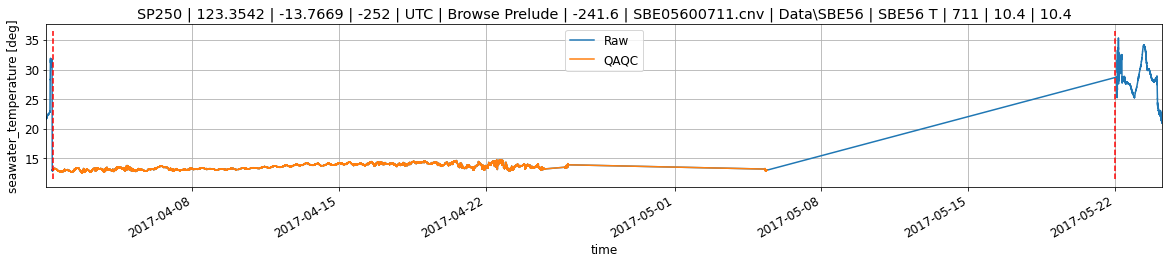

G:\Experiments\kissme17\Data\SBE56\SBE05600725.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600725.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "20.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "725"
G:\Experiments\kissme17\archive\SBE56
Blanking 88834 values.


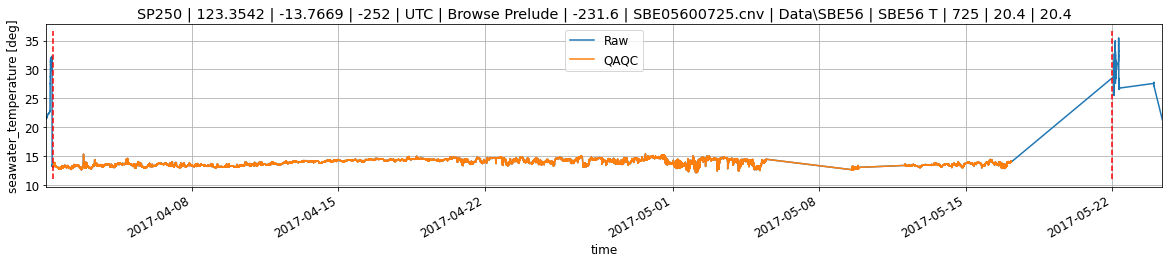

G:\Experiments\kissme17\Data\SBE56\SBE05600781.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600781.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "30.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "781"
G:\Experiments\kissme17\archive\SBE56
Blanking 57601 values.


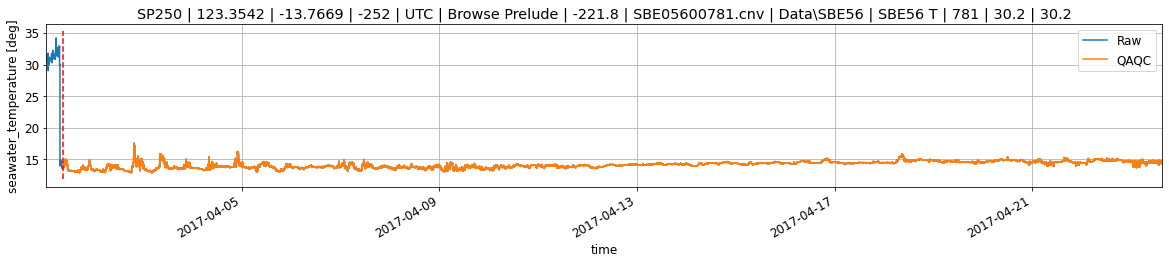

G:\Experiments\kissme17\Data\SBE56\SBE05600877.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600877.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "30.8"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "877"
G:\Experiments\kissme17\archive\SBE56
Blanking 477559 values.


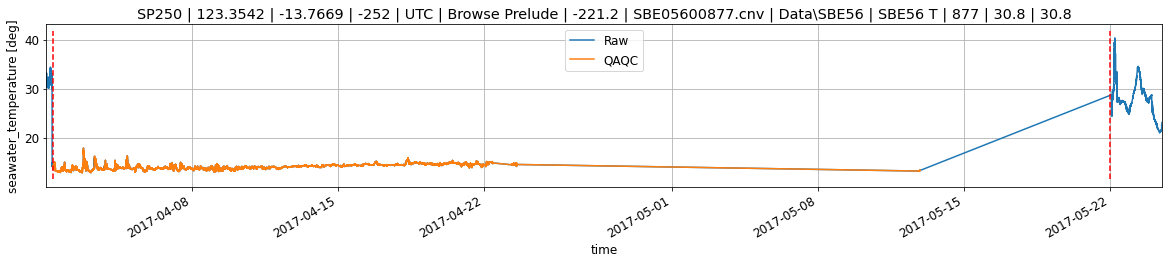

G:\Experiments\kissme17\Data\SBE56\SBE05600878.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600878.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "31.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "878"
G:\Experiments\kissme17\archive\SBE56
Blanking 441048 values.


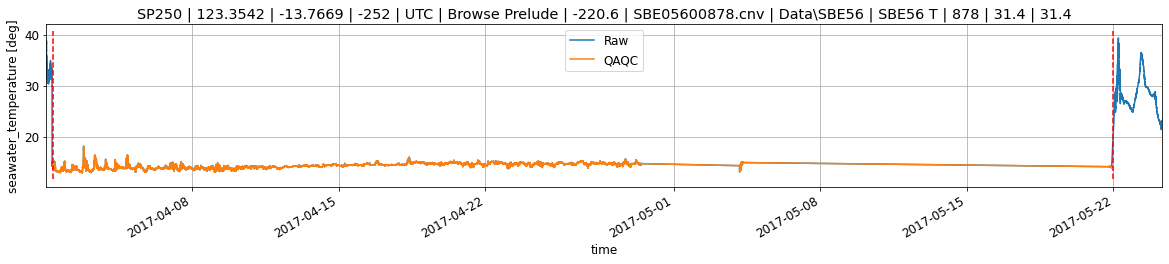

G:\Experiments\kissme17\Data\SBE56\SBE05600879.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600879.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "40.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "879"
G:\Experiments\kissme17\archive\SBE56
Blanking 157886 values.


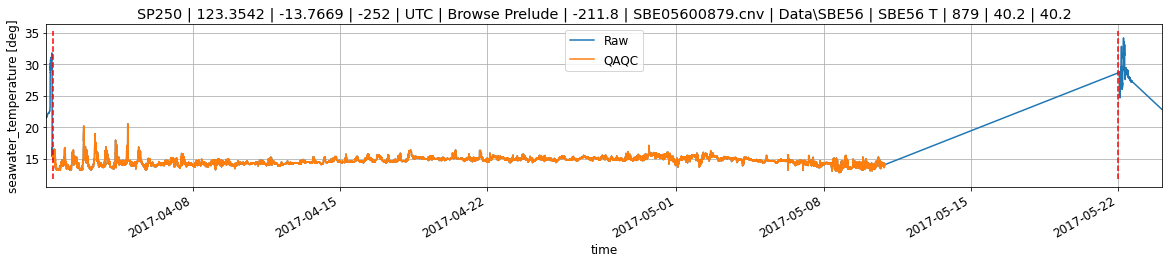

G:\Experiments\kissme17\Data\SBE56\SBE05600881.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600881.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "50.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "881"
G:\Experiments\kissme17\archive\SBE56
Blanking 57681 values.


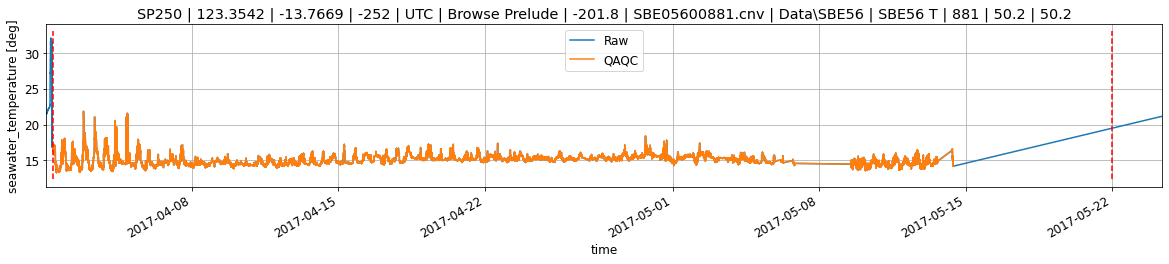

G:\Experiments\kissme17\Data\SBE56\SBE05600907.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600907.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "60.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "907"
G:\Experiments\kissme17\archive\SBE56
Blanking 57672 values.


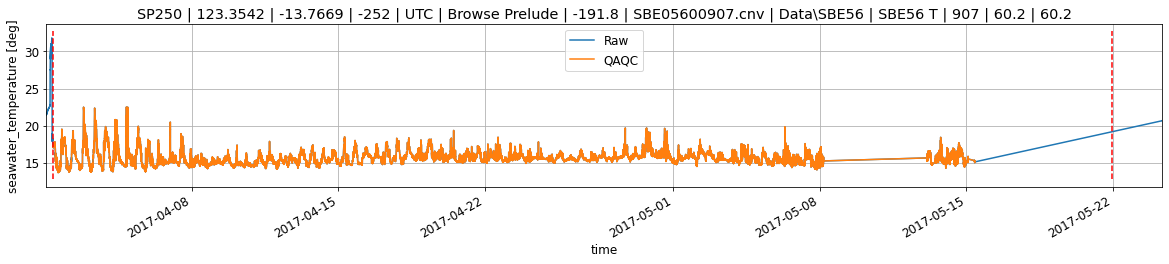

G:\Experiments\kissme17\Data\SBE56\SBE05600908.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600908.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "74.9"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "908"
G:\Experiments\kissme17\archive\SBE56
Blanking 429622 values.


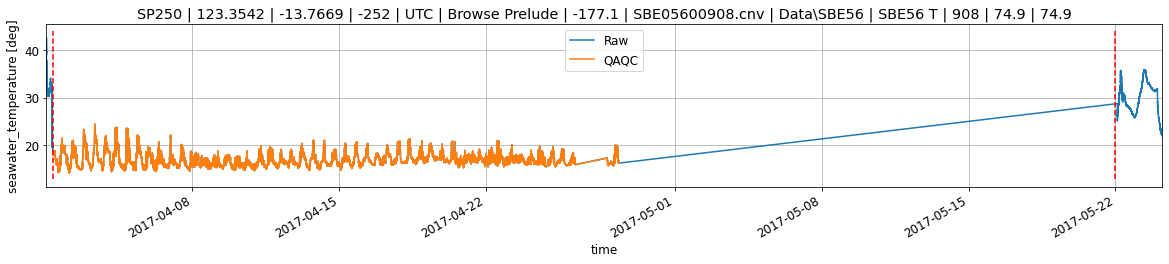

G:\Experiments\kissme17\Data\SBE56\SBE05600909.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600909.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "75.7"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "909"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


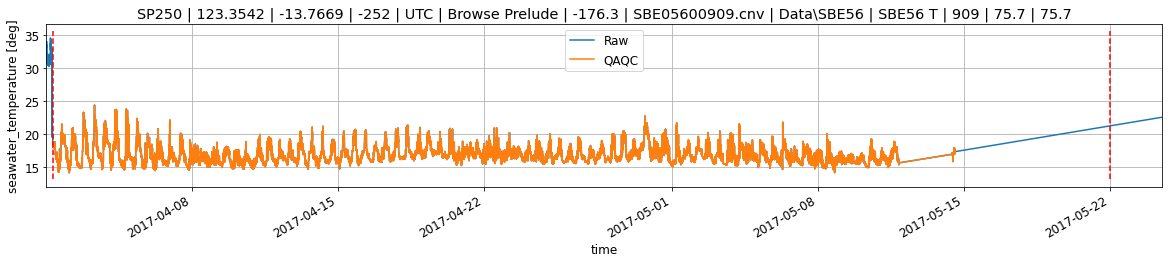

G:\Experiments\kissme17\Data\SBE56\SBE05600910.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600910.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "76.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "910"
G:\Experiments\kissme17\archive\SBE56
Blanking 394863 values.


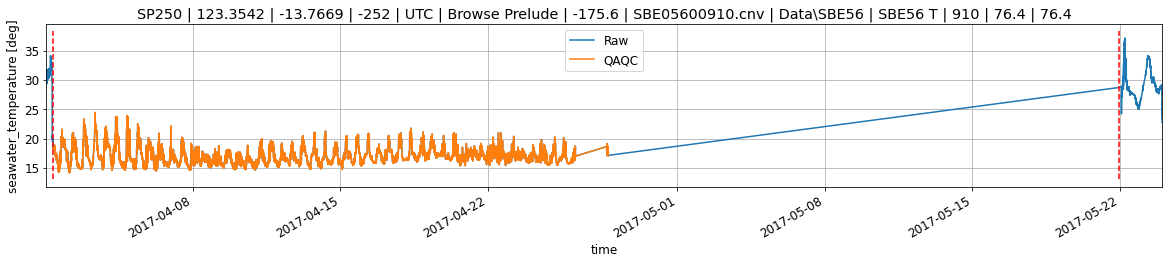

G:\Experiments\kissme17\Data\SBE56\SBE05600912.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05600912.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "80.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "912"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


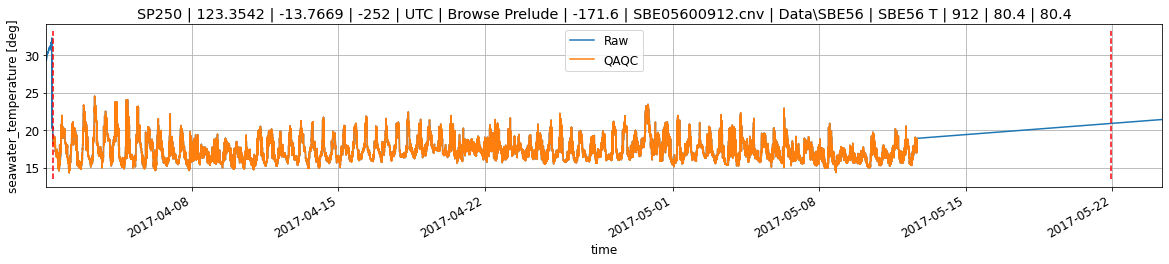

G:\Experiments\kissme17\Data\SBE56\SBE05602975.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05602975.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "90.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "2975"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


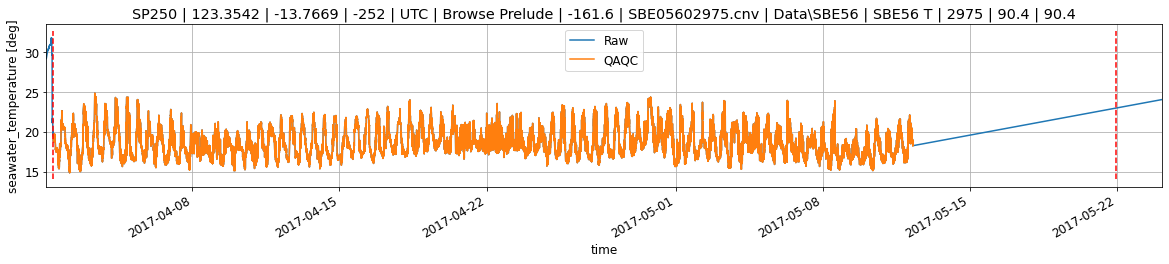

G:\Experiments\kissme17\Data\SBE56\SBE05602976.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05602976.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "100.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "2976"
G:\Experiments\kissme17\archive\SBE56
Blanking 57609 values.


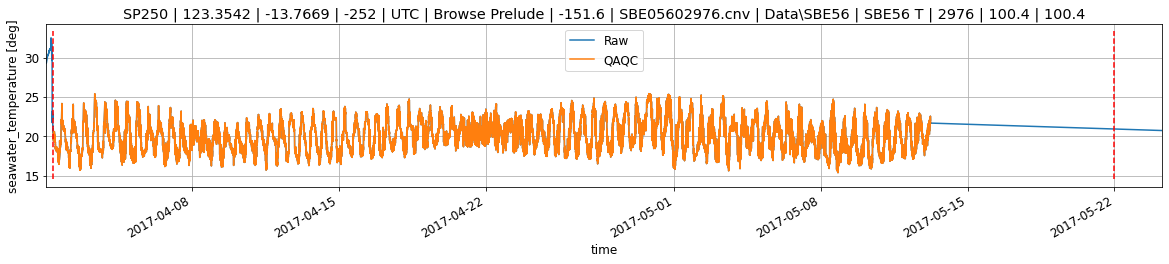

G:\Experiments\kissme17\Data\SBE56\SBE05602977.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05602977.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "110.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "2977"
G:\Experiments\kissme17\archive\SBE56
Blanking 57656 values.


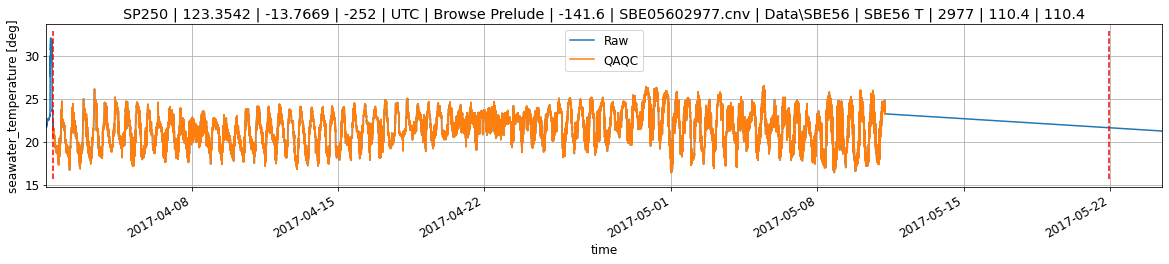

G:\Experiments\kissme17\Data\SBE56\SBE05602978.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05602978.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "120.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "2978"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


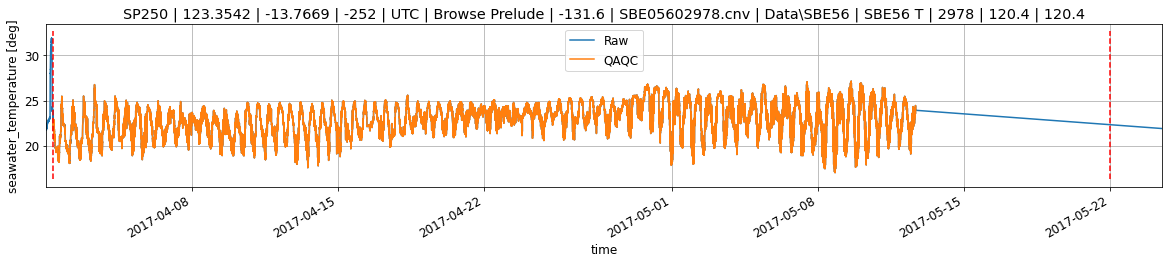

G:\Experiments\kissme17\Data\SBE56\SBE05602981.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05602981.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "130.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "2981"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


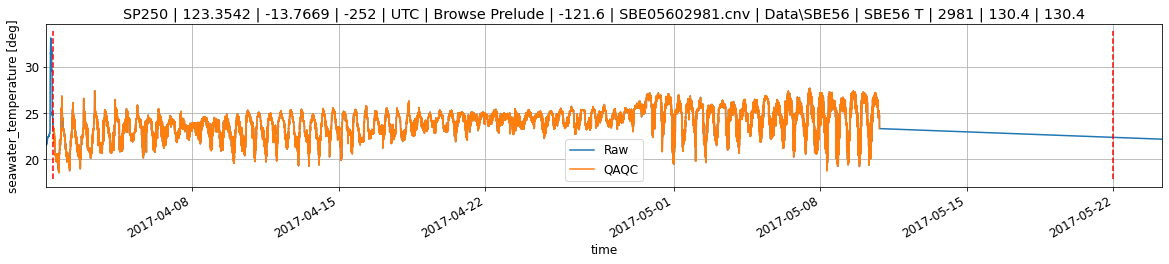

G:\Experiments\kissme17\Data\SBE56\SBE05602983.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05602983.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "140.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "2983"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


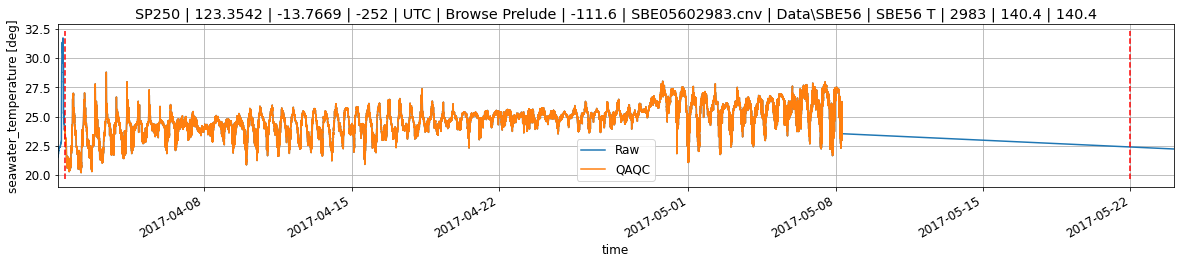

G:\Experiments\kissme17\Data\SBE56\SBE05606964.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05606964.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "150.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "6964"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


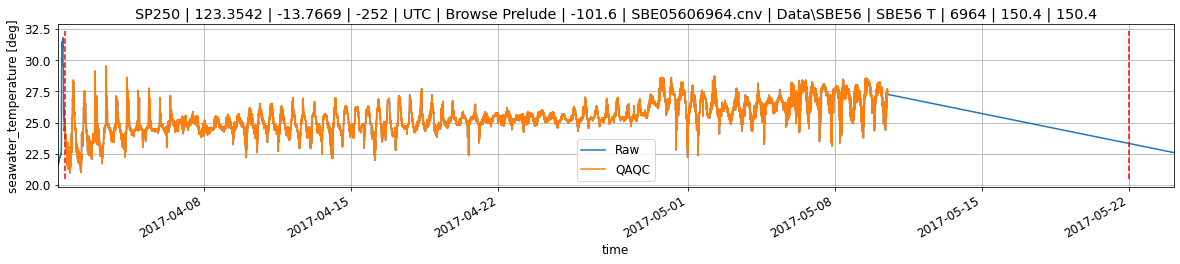

G:\Experiments\kissme17\Data\SBE56\SBE05606965.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05606965.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "170.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "6965"
G:\Experiments\kissme17\archive\SBE56
Blanking 57676 values.


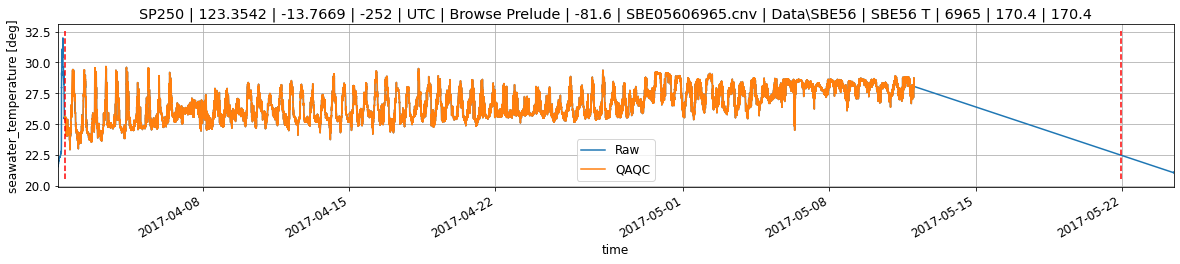

G:\Experiments\kissme17\Data\SBE56\SBE05607274.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607274.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "180.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7274"
G:\Experiments\kissme17\archive\SBE56
Blanking 57653 values.


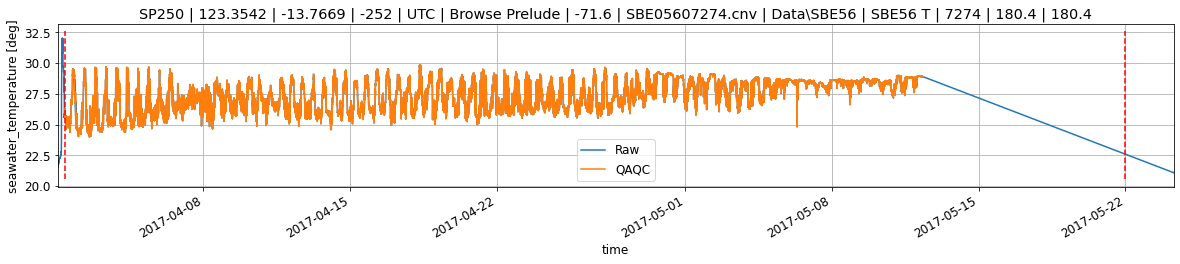

G:\Experiments\kissme17\Data\SBE56\SBE05607308.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607308.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "190.4"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7308"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


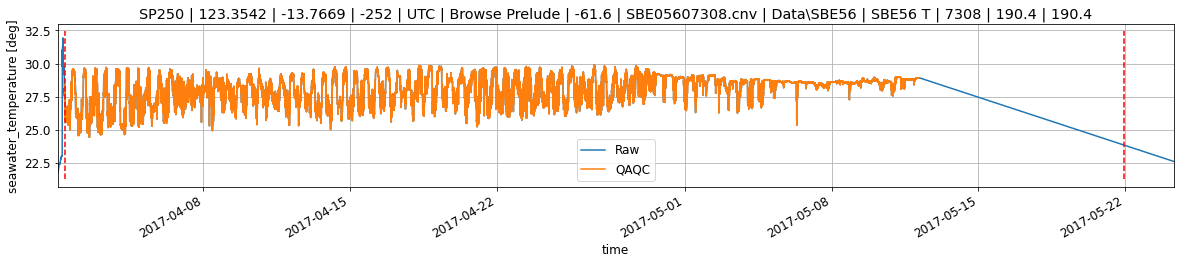

G:\Experiments\kissme17\Data\SBE56\SBE05607319.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607319.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "200.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7319"
G:\Experiments\kissme17\archive\SBE56
Blanking 446988 values.


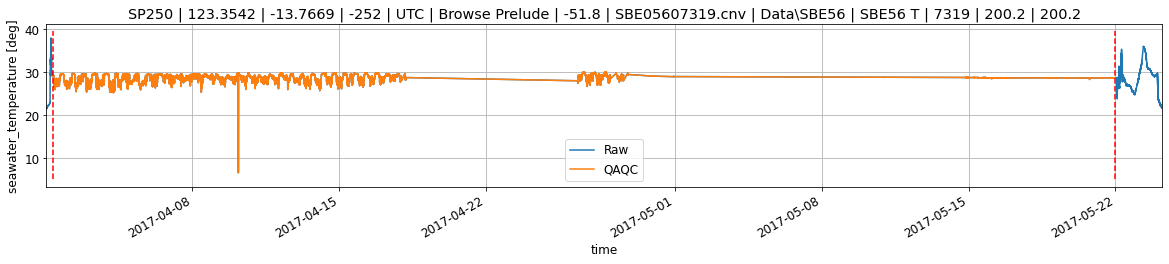

G:\Experiments\kissme17\Data\SBE56\SBE05607338.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607338.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "210.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7338"
G:\Experiments\kissme17\archive\SBE56
Blanking 458689 values.


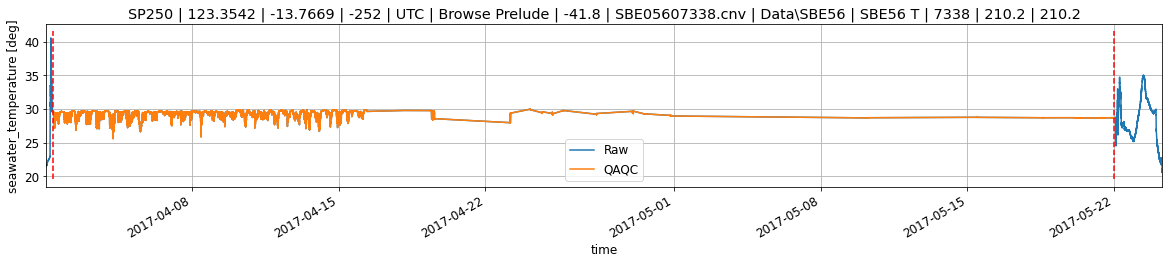

G:\Experiments\kissme17\Data\SBE56\SBE05607339.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607339.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250"
Setting attribute "nominal_latitude" to "-13.7669"
Setting attribute "nominal_longitude" to "123.3542"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "220.2"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7339"
G:\Experiments\kissme17\archive\SBE56
Blanking 487721 values.


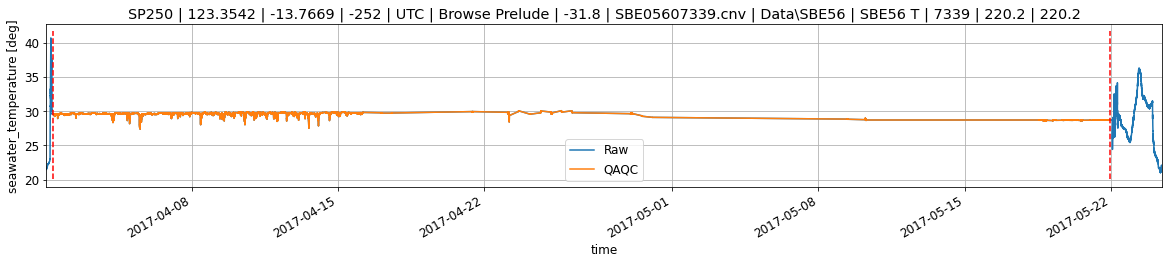

G:\Experiments\kissme17\Data\SBE56\SBE056_01270_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_01270_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "0.05"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "1270"
G:\Experiments\kissme17\archive\SBE56
Blanking 113837 values.


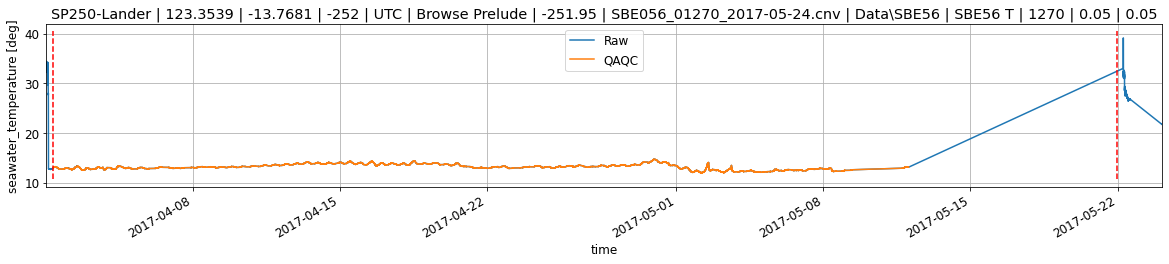

G:\Experiments\kissme17\Data\SBE56\SBE05607340.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607340.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "2.96"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7340"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


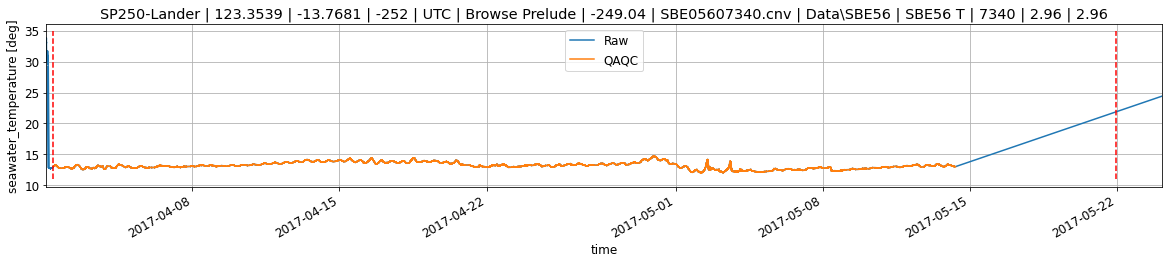

G:\Experiments\kissme17\Data\SBE56\SBE05607341.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607341.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "3.56"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7341"
G:\Experiments\kissme17\archive\SBE56
Blanking 57664 values.


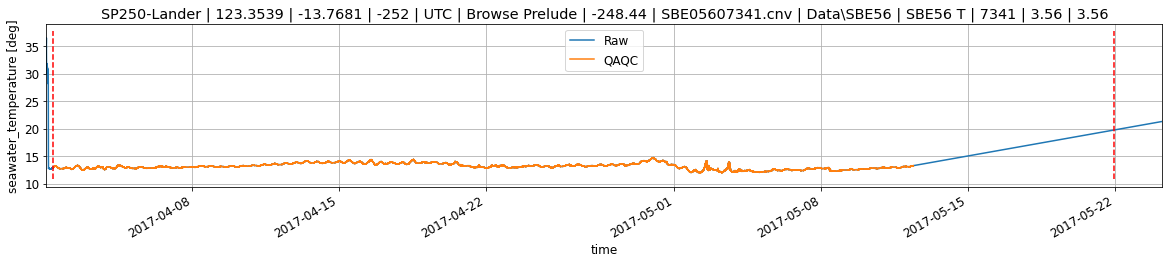

G:\Experiments\kissme17\Data\SBE56\SBE05607342.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607342.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "4.46"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7342"
G:\Experiments\kissme17\archive\SBE56
Blanking 57611 values.


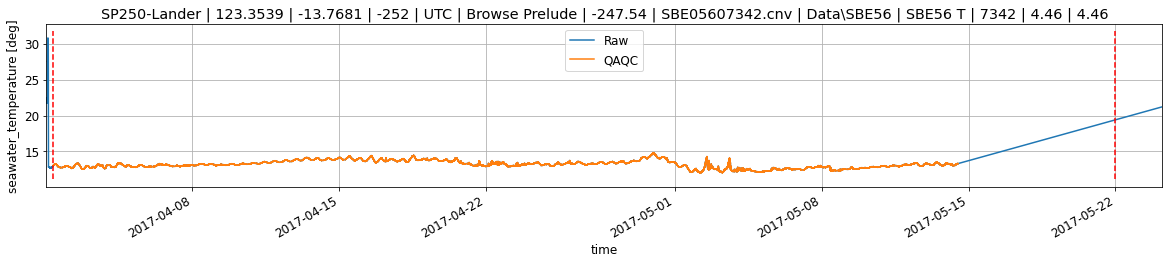

G:\Experiments\kissme17\Data\SBE56\SBE05607343.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607343.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "5.46"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7343"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


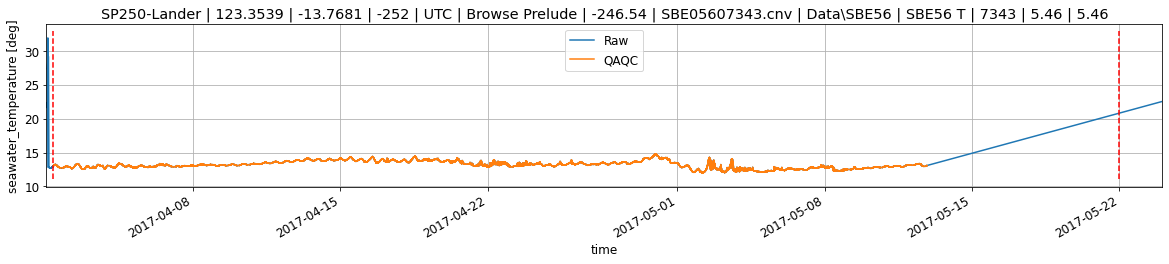

G:\Experiments\kissme17\Data\SBE56\SBE05607344.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607344.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "6.46"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7344"
G:\Experiments\kissme17\archive\SBE56
Blanking 57775 values.


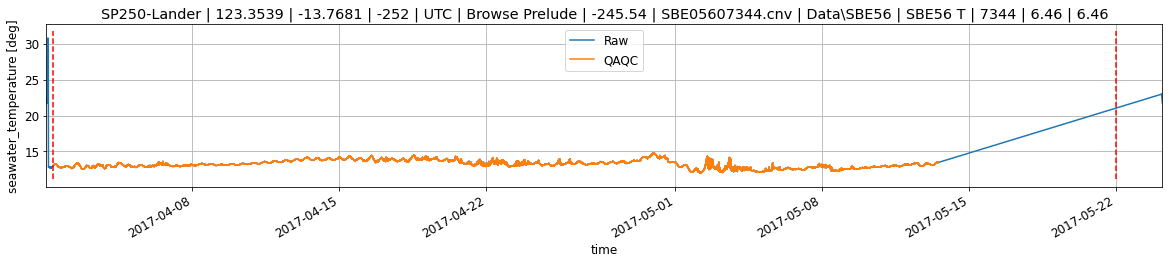

G:\Experiments\kissme17\Data\SBE56\SBE05607345.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607345.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "8.06"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7345"
G:\Experiments\kissme17\archive\SBE56
Blanking 57603 values.


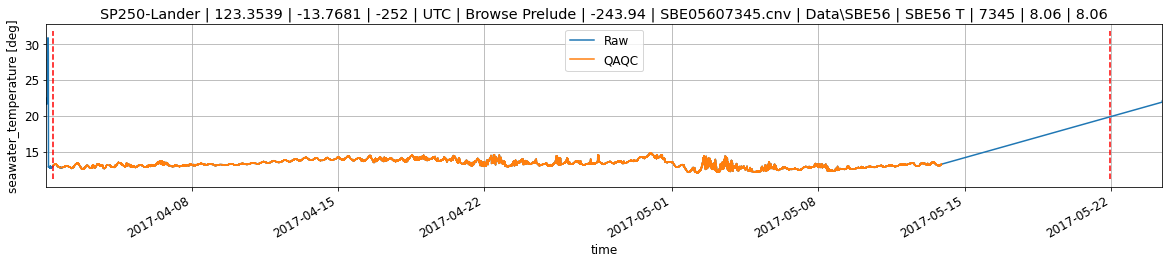

G:\Experiments\kissme17\Data\SBE56\SBE05607346.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607346.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "10.06"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7346"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


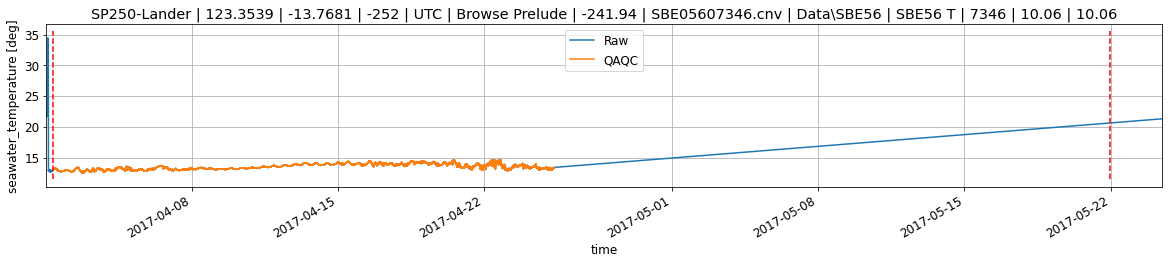

G:\Experiments\kissme17\Data\SBE56\SBE05607347.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607347.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "12.06"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7347"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


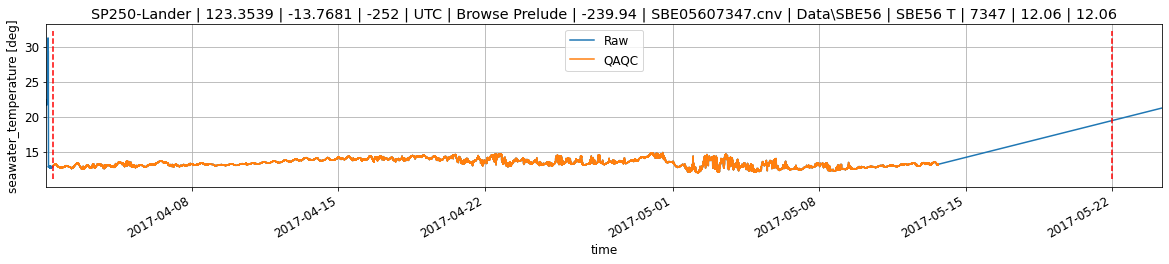

G:\Experiments\kissme17\Data\SBE56\SBE05607369.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607369.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "14.16"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7369"
G:\Experiments\kissme17\archive\SBE56
Blanking 57602 values.


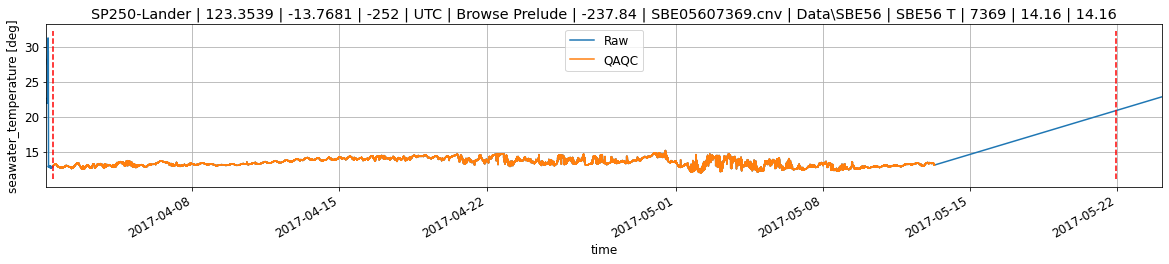

G:\Experiments\kissme17\Data\SBE56\SBE05607370.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE05607370.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "SP250-Lander"
Setting attribute "nominal_latitude" to "-13.7681"
Setting attribute "nominal_longitude" to "123.3539"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "16.16"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "7370"
G:\Experiments\kissme17\archive\SBE56
Blanking 138244 values.


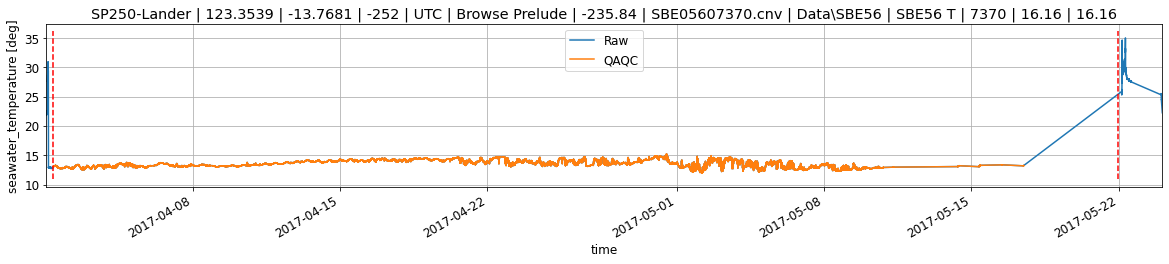

G:\Experiments\kissme17\Data\SBE56\SBE056_01247_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_01247_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "WP250"
Setting attribute "nominal_latitude" to "-13.7659"
Setting attribute "nominal_longitude" to "123.349"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "2.81"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "1247"
G:\Experiments\kissme17\archive\SBE56
Blanking 598301 values.


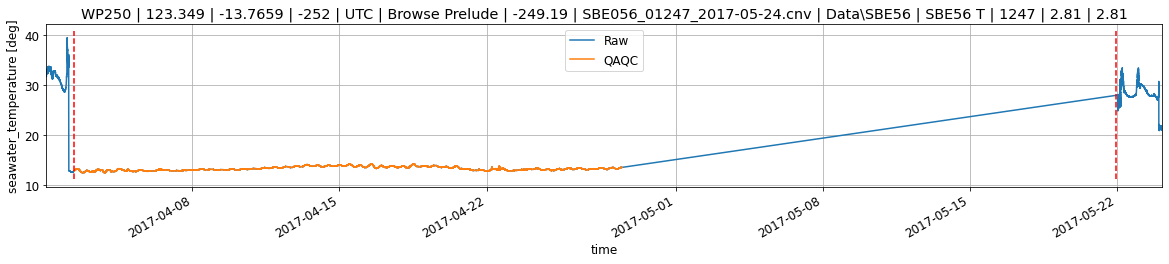

G:\Experiments\kissme17\Data\SBE56\SBE056_01017_2017-05-24.cnv
File exists
Reading CNV file:
	G:\Experiments\kissme17\Data\SBE56/SBE056_01017_2017-05-24.cnv...
No lat/lon stored.
Time code timeK
WARNING, COMPLIANCE CHECK NOT YET IMPLEMENTED.
Setting default attributes of the class.
Setting attribute "title" to "Measured data from a Seabird Data Logger"
Setting attribute "source" to "Seabird Data Logger"
Setting attribute "history" to ""
Setting attribute "comment" to ""
Setting attribute "site" to "Browse Prelude"
Setting attribute "site_station" to "WP250"
Setting attribute "nominal_latitude" to "-13.7659"
Setting attribute "nominal_longitude" to "123.349"
Setting attribute "nominal_site_depth" to "-252.0"
Setting attribute "nominal_instrument_height_asb" to "90.16"
Setting attribute "timezone" to "UTC"
Setting attribute "instrument_model" to "SBE56 T"
Setting attribute "instrument_serial_number" to "1017"
G:\Experiments\kissme17\archive\SBE56
Blanking 230402 values.


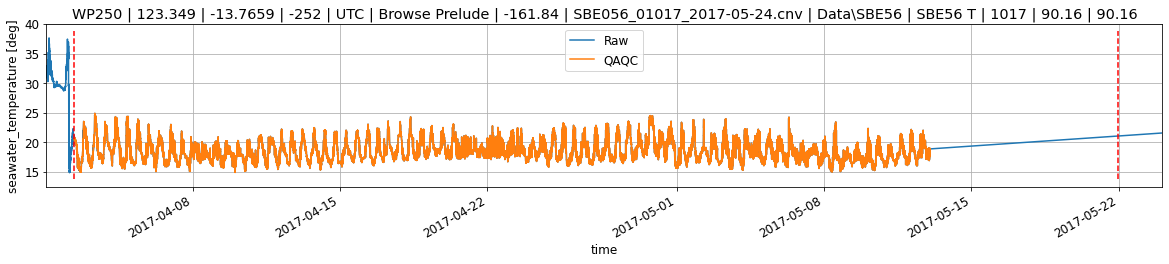

In [7]:
# raise(Exception('This must be converted to the Pandas Dataframe, not csvread.'))
# os.path.exists(csvfile)

filetypes = ['SBE56 T', 'SBE37 CTD', 'SBE37 CT'];
filetypes = ['SBE56 T', 'SBE37 CTD'];
moorings = db_data['possible_mooring_dates']['Mooring'].values

for index, row in db_data['deployment_metadata'].iterrows():

    mooring = row['StationID']
    instrument = row['InstrumentType']
    sn = row['SerialNo']
    attributes = {
        'site': row['Site'],
        'site_station': row['StationID'],
        'nominal_latitude': float(row['Latitude']),
        'nominal_longitude': float(row['Longitude']),
        'nominal_site_depth': float(row['Depth']),
        'nominal_instrument_height_asb': float(row['InstrumentHeight']),
        'timezone': row['TimeZone'],
        'instrument_model': row['InstrumentType'],
        'instrument_serial_number': row['SerialNo'],
        }
    
    if not mooring.lower() in moorings:
        print('Skipping ' + mooring)
        continue

    if instrument in filetypes:

        asc_filename = os.path.join(project_root, row['FilePath'], row['FileName'])
        print(asc_filename)

        if os.path.exists(asc_filename):
            print('File exists')
        else:
            raise(Exception)

#             mcout_asc = read_sbd.parse_seabird_cnv(asc_filename)
        folder, file = os.path.split(asc_filename)
        rr = wrap_sbd.SEABIRD_37_39_56(folder, file, model=instrument[0:5])
        rr.update_attributes_with_dict(attributes)

#         ai.qc_impossible_date(rr, mooring, db_data)
        pqc.pimosInOutWaterQC(rr, mooring, db_data, year_1=1890)

        ai.pIMOS_export(rr, archive_dir, instrument[0:5], sn)
        fig = ai.plot_temp(rr, db_data, mooring, title=' | '.join([str(i) for i in row.values]))
        fig.savefig(rr.fullpath + '.png', dpi=300)
        